# Pandas Tricks

*Rappel et/ou découverte de manipulation de matrices de données avec pandas*

### Lire un tableur



In [1]:
import pandas as pd

# préciser le chemin du fichier à lire
cheminDuFichierCSV = "./../data/dictionary/1757_Buchanan-J.csv" 

# demander à pandas de lire le fichier et garder ce tableau accessible dans une variable
dfDicoBuch = pd.read_csv(cheminDuFichierCSV, delimiter=";", encoding="utf8")

# afficher à l'écran un échantillon du tableau
dfDicoBuch.sample(n=5)

,nbSyll,pron,origin,warning,remarques,POS,lineId,pageId
7569,2,lāʹbo_u_r,L.,NaN,NaN,n.,6.0,126
3692,3,dĭsăgreeʹ,F.,NaN,NaN,v.,74.0,70
14723,2,ŭnchāʹſte,NaN,NaN,NaN,a.,37.0,226
2242,5,cĭrcŭmſcrĭʹption,L.,NaN,NaN,n.,52.0,50
1633,2,bŭllock,NaN,nbSyll>1 et pas d'accent tonic,NaN,n.,16.0,42


Pour lires des tableurs aux format xls, xlsx ou odt il faut utiliser pd.read_excel(cheminDuFichier) et je conseil de bien préciser explicitement l'engine à utiliser en paramètre.
* dfXlsx = pd.read_excel(cheminDuFichierXLSX, engine="openpyxl")
* dfOds = pd.read_excel(cheminDuFichierODS, engine="odf")

### Ajouter un nouvelle colonne contenant le resultat d'un traitement

In [2]:
# définir une fonction qui retourne quelque chose
def sizePron(strPron):
    #retourner le nombre de caractère de la prononciation
    
    return len(strPron)



In [3]:
# appeler cette fonction sur toutes les lignes de la matrice pour remplir une nouvelle colonne grace à apply
dfDicoBuch['sizePron'] = dfDicoBuch.apply(lambda x: sizePron(x['pron']),1)

dfDicoBuch.sample(n=5)

,nbSyll,pron,origin,warning,remarques,POS,lineId,pageId,sizePron
10530,4,prĕʹfĕrable,NaN,NaN,NaN,a.,73.0,167,11
9522,3,ovĕrloaʹd,NaN,NaN,NaN,v.,70.0,153,9
13211,2,ſtūʹpid,L.,NaN,NaN,a.,28.0,205,7
9675,1,pāne,NaN,NaN,NaN,n.,11.0,156,4
2286,3,clărĕncĭeuʹx,NaN,NaN,NaN,n.,24.0,51,12


## Un petit calcul

In [4]:
dfDicoBuch['sizePron'].median()

9.0

## Une recherche de valeur

In [5]:
dfDicoBuch[dfDicoBuch['sizePron']==26.0]

,nbSyll,pron,origin,warning,remarques,POS,lineId,pageId,sizePron
2813,3,contrŏʹller or comptrollĕr,NaN,NaN,NaN,n.,49.0,58,26
7492,3,kaʹlĕnd_a_r or caʹlĕnd_a_r,NaN,NaN,NaN,n.,2.0,125,26


## Afficher des graphiques
Plusieurs librairie possibles :
* matplotlib (static, bonne qualité pour publication)
* seaborn (interactif, pour le web)
* bokeh (interactif, pour le web)
* plotly (interactif, pour le web)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='nbSyll', ylabel='sizePron'>

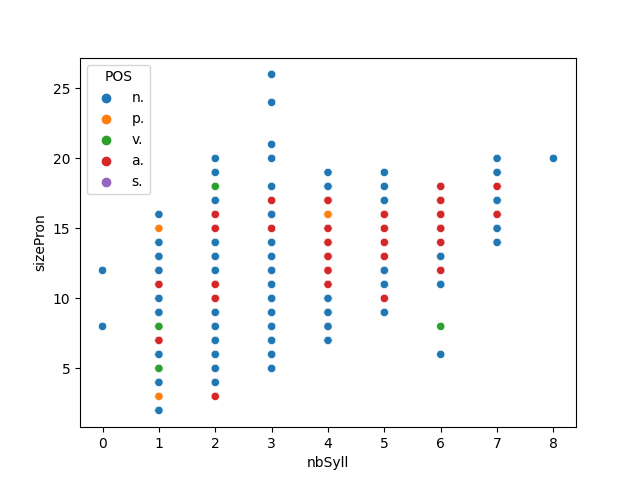

In [10]:
#magic interface
%matplotlib ipympl

plt.figure("scatter plot view")
sns.scatterplot(data=dfDicoBuch, x="nbSyll", y="sizePron", hue="POS")

<AxesSubplot:xlabel='nbSyll', ylabel='sizePron'>

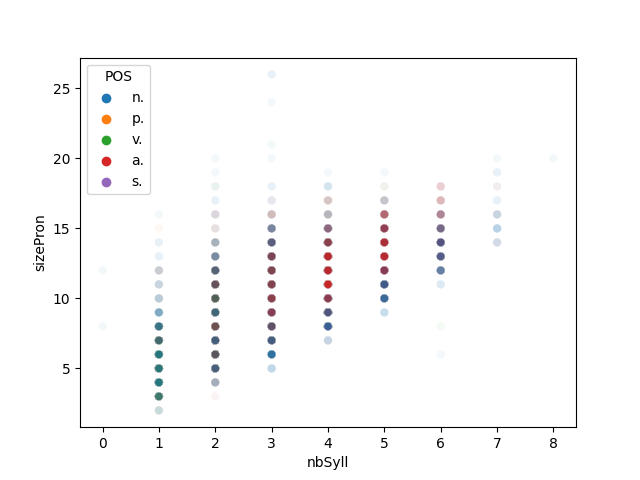

In [11]:
%matplotlib ipympl

plt.figure("scatter plot view")
sns.scatterplot(data=dfDicoBuch, x="nbSyll", y="sizePron", hue="POS", alpha=0.05)

## Manipuler des matrices de format exotique

In [18]:
cheminDuDicoBigi = "./../data/dictionary/2015_Bigi-B.dict" 

# ouvrir une matric exotique
#dfDicoBigi = pd.read_csv(cheminDuDicoBigi, delimiter=r" [] ", encoding="utf8")

dfDicoBigi = pd.read_csv(cheminDuDicoBigi, delimiter=" \[\] ", encoding="utf8", engine='python', names=['hwd','pronSampa'], skiprows=8 )

# afficher à l'écran un échantillon du tableau
dfDicoBigi.head(n=5)

,hwd,pronSampa
0,a,@
1,a(2),eI
2,a'ready,@ r\ E d i:
3,a's,eI z
4,a.,eI


Intro/rappel Regex : https://gitlab.huma-num.fr/mnauge/cnam-athon-transcrire/-/blob/master/codes/regexBasics.ipynb

## Jouer avec deux matrices à la fois

In [36]:
cheminDuMappingSampaIpa = "./../data/dictionary/sampa-ipa.txt" 
dfMappingSampaIpa = pd.read_csv(cheminDuMappingSampaIpa, delimiter=" +", encoding="utf8", engine='python', names=['sampa','ipa'])
dfMappingSampaIpa.sample(n=3)

,sampa,ipa
76,X,χ
5,-\,‿
126,d_<,ɗ


In [20]:
dfMappingSampaIpa['sampa'].value_counts()

r      3
U~/    2
h      2
g      2
@      2
      ..
R      1
N\     1
r\`    1
q      1
_a     1
Name: sampa, Length: 177, dtype: int64

In [21]:
dfMappingSampaIpa[dfMappingSampaIpa['sampa']=='@']

,sampa,ipa
28,@,ə
29,@,ɛ


In [22]:
# ne garder que la première occurence pour éviter une indécision mais ce n'est pas terrible. A discuter avec les linguistes.
dfMappingSampaIpa.drop_duplicates(subset=['sampa'], keep='first', inplace=True)

In [23]:
dfMappingSampaIpa[dfMappingSampaIpa['sampa']=='@']

,sampa,ipa
28,@,ə


In [48]:
print(dfMappingSampaIpa[dfMappingSampaIpa['sampa']=='A'])
print(dfMappingSampaIpa[dfMappingSampaIpa['sampa']=='r\\'])
print(dfMappingSampaIpa[dfMappingSampaIpa['sampa']=='t'])
print(dfMappingSampaIpa[dfMappingSampaIpa['sampa']=='i'])


   sampa ipa
32     A   ɑ
    sampa ipa
157    r\   ɹ
    sampa ipa
163     t   t
    sampa ipa
137     i   i


In [24]:
def sampa2ipa(strSampa, dfMapping):
    ipaRes = ""
    
    listValSampa = strSampa.split(" ")
    #print(listValSampa)
    for valSampa in listValSampa:
        dfRowFinded = dfMapping[dfMapping['sampa']==valSampa]

        if len(dfRowFinded==1):
            ipaRes+=dfRowFinded.iloc[0]['ipa']
        else:
            ipaRes+='?'
    return ipaRes

In [25]:
sampa2ipa("A r\ t i",dfMappingSampaIpa)

'ɑɹti'

In [26]:
dfDicoBigiRich = dfDicoBigi.sample(n=1000).copy()

dfDicoBigiRich['ipa'] = dfDicoBigiRich.apply(lambda x: sampa2ipa(x['pronSampa'], dfMappingSampaIpa),1)


In [27]:
dfDicoBigiRich.sample(n=5)

,hwd,pronSampa,ipa
30665,diede,d i: d,diːd
78210,monfils,m A n f i l z,mɑnfilz
3814,angelinos(2),{ N g @ l i: n @U z,æŋgəliːnoʊz
42337,footnoting,f U t n @U 4 i N,fʊtnoʊɾiŋ
103854,scholar's,s k A l 3:r z,skɑlɜ:rz


### Sauvegarder la nouvelle matrice


In [28]:
pathDicoBigiRich = "./../data/dataframe/BigiRichSample.csv"
dfDicoBigiRich.to_csv(pathDicoBigiRich, sep=";",encoding="utf8",index=False)